In [122]:
import numpy as np
import json
from scipy import stats
import matplotlib.pyplot as plt

R0 = 8

DATA_FILE = f'/Users/brendan/Documents/projects/risky_sir/go/data/R0_{R0}.json'

colors = ["blue", "magenta", "red"]
linestyles = ['-', '--', ':']

with open(DATA_FILE) as file:
    all_data = json.load(file)

In [123]:
def plot_series(series, description, get_value, R0=R0, title="Final size"):
    plt.figure(figsize=(12, 6))
    plt.ylabel(title)
    plt.xlabel('alpha_c')
    plt.ylim([0, 1020])
    plt.title(f'{title} vs alpha_c (total R0 = {R0}) -- {description}')
    for i, p in enumerate(['25', '5', '75']):
        for j, var in enumerate(['low', 'medium', 'high']):
            data = series[(2-i)*3 + (2-j)]
            alphaCs = []
            values = []
            for tr in data['TrialResults']:
                alphaCs.append(tr['Parameters']['AlphaC']*1000)
                values.append(get_value(tr))
            plt.plot(alphaCs, values, label=data['Description'], color=colors[i], linestyle=linestyles[j])
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

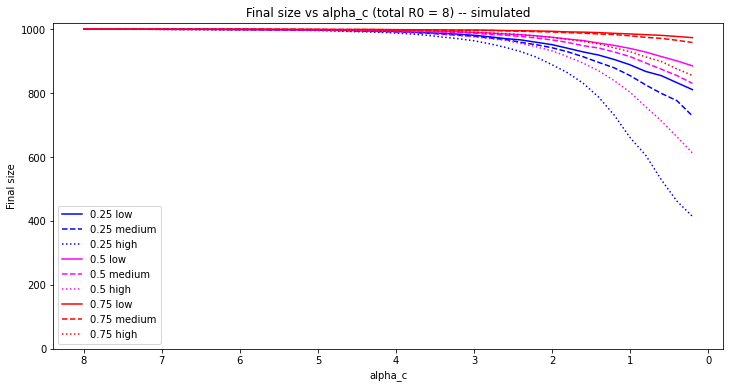

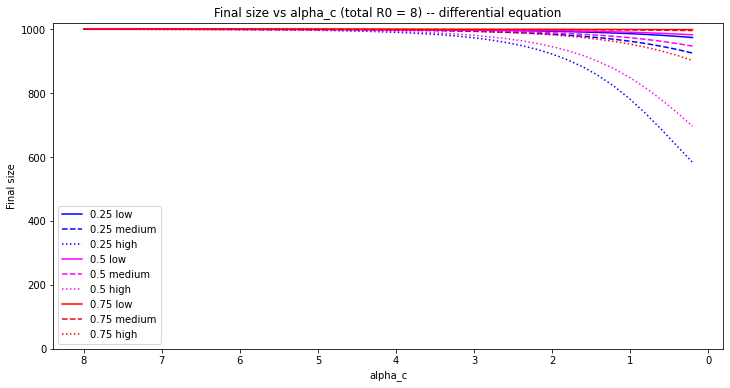

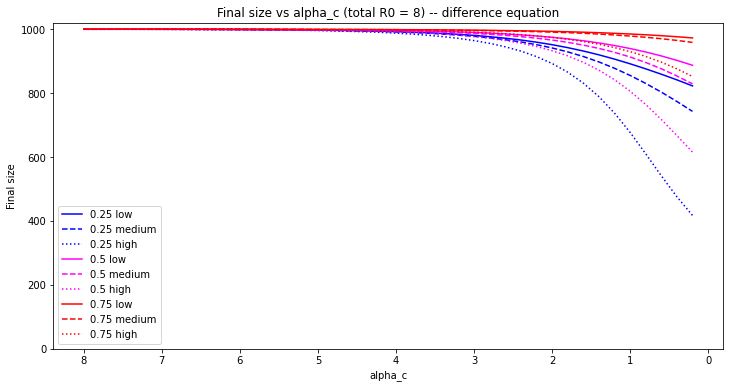

In [124]:
def get_mean(tr):
    count = 0
    total = 0
    for r in tr['SimulationResults']['FinalRs']:
        if r >= 400:
            total += r
            count += 1
    value = total / count if count > 0 else None
    return value

plot_series(all_data['RiskStructured'], "simulated", get_mean)
plot_series(all_data['RiskStructured'], "differential equation", lambda tr: tr["DifEqResults"]["FinalR"])
plot_series(all_data['RiskStructured'], "difference equation", lambda tr: tr["DifferenceResults"]["FinalR"])

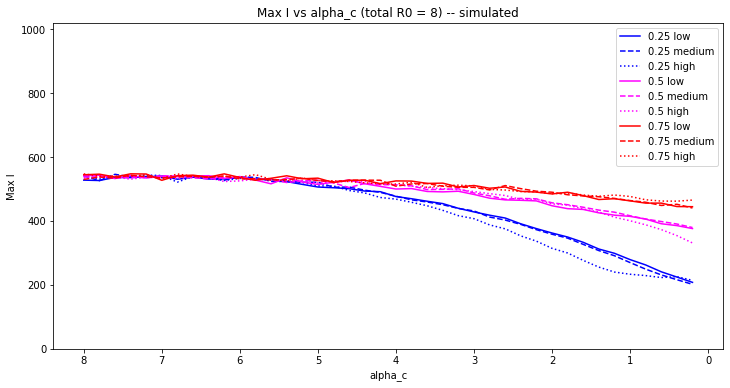

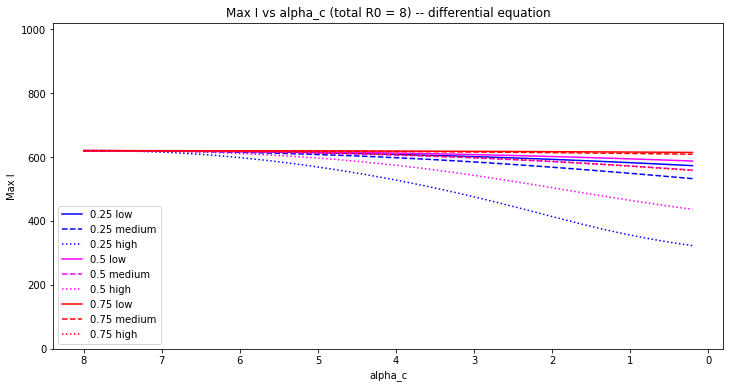

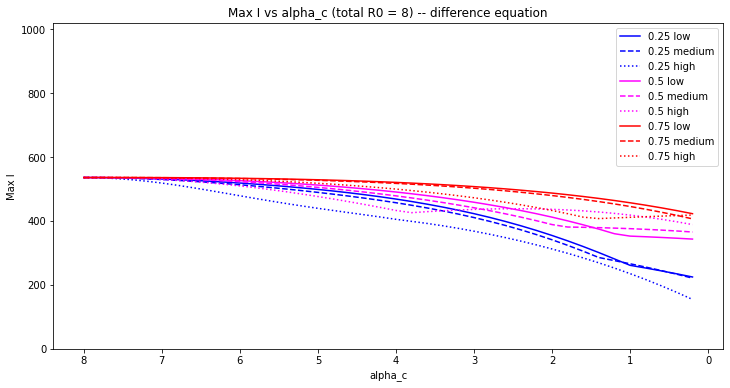

In [125]:
title="Max I"
def get_mean(tr):
    count = 0
    total = 0
    for r in tr['SimulationResults']['MaxIs']:
        if r >= 100:
            total += r
            count += 1
    value = total / count if count > 0 else None
    return value

plot_series(all_data['RiskStructured'], "simulated", get_mean, title=title)
plot_series(all_data['RiskStructured'], "differential equation", lambda tr: tr["DifEqResults"]["MaxI"], title=title)
plot_series(all_data['RiskStructured'], "difference equation", lambda tr: tr["DifferenceResults"]["MaxI"], title=title)

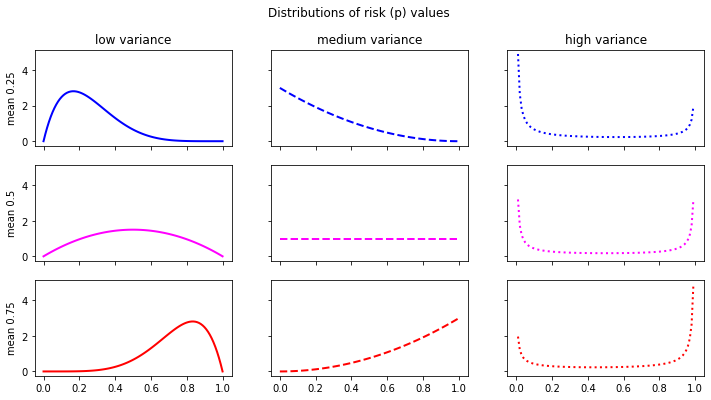

In [95]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 6))
fig.suptitle("Distributions of risk (p) values")
bases = [(1, 3, "mean 0.25"), (1, 1, "mean 0.5"),  (3, 1, "mean 0.75")]
factors = [(2, "low variance"), (1, "medium variance"), (0.1, "high variance")]
linestyles = ['-', '--', ':']
for i, (a, b, desc_i) in enumerate(bases):
    for j, (f, desc_j) in enumerate(factors):
        

        x = np.linspace(0, 1, 100)

        g = stats.beta(f*a, f*b)
        axs[i][j].plot(x, g.pdf(x), lw=2, color=colors[i], linestyle=linestyles[j])
        if (i == 0):
            axs[i][j].set_title(desc_j)
        if (j == 0):
            axs[i][j].set_ylabel(desc_i)
        #plt.legend()

#g.std()

In [55]:
# %matplotlib notebook
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# # 3d plot of successive histograms
# data_for_2 = all_data['Heterogeneous'][0]['TrialResults']
# final_rs = []
# x = range(0, 1000, 100)
# for i in range(len(data_for_2)):
#     final_rs.append(np.histogram(data_for_2[i]['FinalRs'], bins=x))

# y = range(0, len(final_rs))
# X, Y = np.meshgrid(x, y)
# z = np.zeros((len(final_rs), len(final_rs[0][0]) + 1))
# for j in range(len(data_for_2)):
#     for i in range(len(final_rs[0][0])):
#         z[149 - j, i] = final_rs[j][0][i]
# fig = plt.figure()
# ax = Axes3D(fig)
# surf = ax.plot_surface(X, Y, z, cmap=cm.coolwarm)


In [54]:
def compute_r(R0, N=1000):
    upper_r = 1
    lower_r = 0
    for T in range(1000):
        r = (upper_r + lower_r)/2
        r_ = (1 - np.exp(-R0 * r))
        if r_ < r:
            upper_r = r
        else:
            lower_r = r
    return r*N

compute_r(8)

999.6636334491886